1D heat diffusion solution with an implicit scheme from module 4 lesson 2

In [21]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [22]:
plt.rc('font', family = 'serif', size = 16)

In [23]:
# Set parameters.
L = 1.0
nx = 51
dx = L / (nx - 1)
x = np.linspace(0.0, L, num = nx)

alpha = 1.22e-3
q = 0.0

# Set initial conditions.
T0 = np.zeros(nx)
T0[0] = 100.0

In [28]:
def btcs(u0, nt, dt, dx, alpha, q=0.0):
    '''BTCS scheme, implicit'''
    u = u0.copy()
    sigma = alpha * dt / dx**2
    A = lhs_operator(nx-2, sigma) # System of equations
    for n in range(nt):
        b = rhs_vector(u, sigma, q * dx) # Known conditions
        # Using the solve function from the numpy library
        u[1:-1] = np.linalg.solve(A, b)     # input are matrix A and vector b
        # Update boundary values
        u[0] = u0[0]
        u[-1] = u[-2] + q * dx
    return u

In [29]:
def lhs_operator(N, sigma):
    # Diagonal coefficients in the matrix.
    D = np.diag((2 + 1 / sigma) * np.ones(N))
    D[-1, -1] = 1 + 1 / sigma
    # Upper diagonal.
    U = np.diag(-1.0 * np.ones(N-1), k=1) # k = 1 accesses the upper diagonal
    # Lower diagonal
    L = np.diag(-1.0 * np.ones(N-1), k=-1)
    # Assemble A
    A = D + U + L
    
    return A

In [30]:
def rhs_vector(T, sigma, qdx):
    b = T[1:-1] / sigma
    # Dirichlet
    b[0] += T[0]
    b[-1] += qdx
    return b

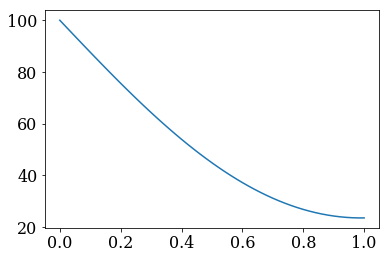

In [39]:
nt = 1000
sigma = 0.5
dt = sigma * dx**2/alpha

T = btcs(T0, nt, dt, dx, alpha, q = 0.0)

plt.plot(x, T)
# plt.xlim(0.0,L)
# plt.ylim(0.0, 100,0)